## 📊 Bakery Data Lab - Transactions Analysis Notebook

### 🧁 Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### 📦 Connect to your bakery-manager SQLite database

In [ ]:
conn = sqlite3.connect("../../bakery-manager/bakery.db")

### 🔍 Load transactions into a DataFrame

In [ ]:
query = "SELECT * FROM transactions"
df = pd.read_sql_query(query, conn)
df.head()

### 🧠 Explore the structure

In [ ]:
print(df.info())
print(df.describe())

### 📈 Total revenue vs expenses

In [ ]:
summary = df.groupby("transaction_type")["amount"].sum()
summary.plot(kind="bar", title="Total Revenue vs Expenses", ylabel="Amount ($)", xlabel="Type", color=["green", "red"])
plt.tight_layout()
plt.show()

### ⏱️ Convert date column to datetime

In [ ]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

### 📅 Plot rolling 7-day revenue

In [ ]:
sales_only = df[df["transaction_type"] == "sale"]
sales_only.set_index("date", inplace=True)
rolling = sales_only["amount"].rolling("7D").sum()

rolling.plot(title="7-Day Rolling Sales")
plt.ylabel("$ Total")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

### 📊 Top Expense Categories

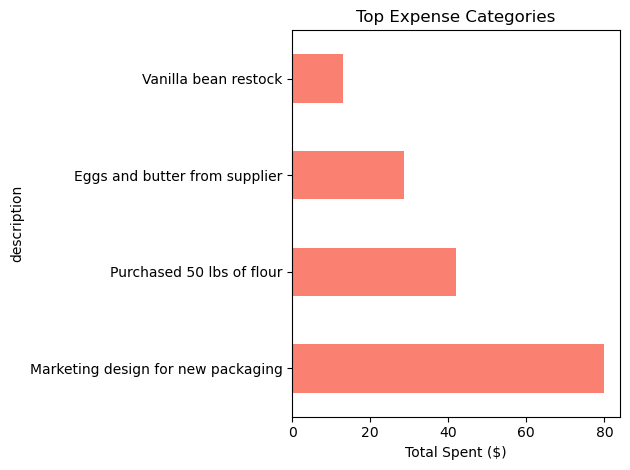

In [8]:
top_expenses = df[df["transaction_type"] == "expense"]
top_expenses.groupby("description")["amount"].sum().sort_values(ascending=False).plot(
    kind="barh", title="Top Expense Categories", color="salmon"
)
plt.xlabel("Total Spent ($)")
plt.tight_layout()
plt.show()


### 🔍 Daily Summary Table

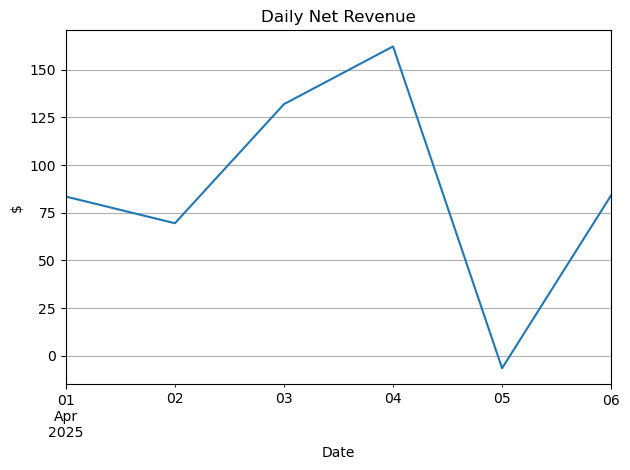

In [9]:
summary = df.pivot_table(index="date", 
                         columns="transaction_type", 
                         values="amount", 
                         aggfunc="sum").fillna(0)

summary["net"] = summary.get("sale", 0) - summary.get("expense", 0)
summary

summary["net"].plot(kind="line", title="Daily Net Revenue")
plt.ylabel("$")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📅 Weekly Grouping

<Axes: title={'center': 'Weekly Revenue + Expenses'}, xlabel='week'>

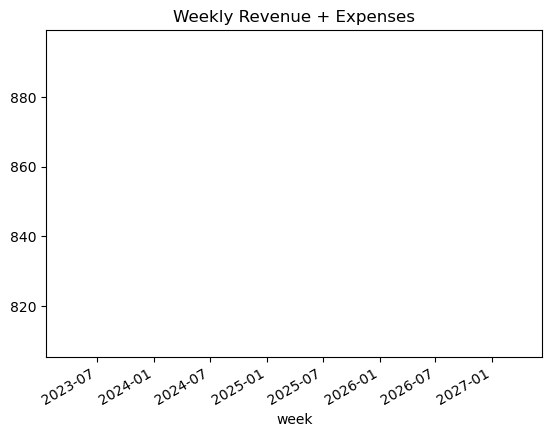

In [10]:
df["week"] = df["date"].dt.to_period("W").apply(lambda r: r.start_time)
df.groupby("week")["amount"].sum().plot(kind="line", title="Weekly Revenue + Expenses")
